In [1]:
from src.data.make_dataset import get_data, handling_categories, handling_continuous_columns
from src.features.build_features import create_new_features, selecting_best_linear_features, selecting_best_tree_features
from src.models.train_model import train_logistic_regression, train_naive_bayes, train_decision_tree, train_random_forest, train_xgboost, train_lightgbm, train_catboost
from src.visualization.visualize import model_comparison
from src.models.predict_model import predictions, model_evaluation, model_report
from sklearn.model_selection import train_test_split
import pandas as pd
import pickle

In [2]:
df = get_data()
df = handling_categories(df)
df = create_new_features(df)
df, lambda1, lambda2, lambda3, lambda4, lambda5 = handling_continuous_columns(df)

C:\Users\suraj\OneDrive\Desktop\Resume Projects\credit_risk_analysis\src\data\make_dataset.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['class'].replace({1: 0, 2:1}, inplace=True)


In [3]:
print("Data shape: ", df.shape)

Data shape:  (1000, 23)


In [4]:
print("Data columns: ", df.columns)

Data columns:  Index(['Existing-Checking-Account-Status', 'Duration(Months)',
       'Credit-History', 'Purpose', 'Credit-Amount', 'Savings-Account(Bonds)',
       'Present-Employment-Since', 'Installment-Rate(%)',
       'Personal-Status-Sex', 'Other-Debtors', 'Present-Residence-Since',
       'Property', 'Age', 'Other-Installment-Plans', 'Housing',
       'Bank-Existing-Credits', 'Job', 'Total-Reliable-People', 'Telephone',
       'Foreign-Worker', 'class', 'Debt_to_Income_Ratio',
       'Credit_Utilization'],
      dtype='object')


In [5]:
df.head(1)

,Existing-Checking-Account-Status,Duration(Months),Credit-History,Purpose,Credit-Amount,Savings-Account(Bonds),Present-Employment-Since,Installment-Rate(%),Personal-Status-Sex,Other-Debtors,...,Other-Installment-Plans,Housing,Bank-Existing-Credits,Job,Total-Reliable-People,Telephone,Foreign-Worker,class,Debt_to_Income_Ratio,Credit_Utilization
0,0,2.024562,4,4,5.672672,4,4,4,2,0,...,2,1,2,2,1,1,0,0,0.230208,0.314073


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Existing-Checking-Account-Status  1000 non-null   int64  
 1   Duration(Months)                  1000 non-null   float64
 2   Credit-History                    1000 non-null   int64  
 3   Purpose                           1000 non-null   int64  
 4   Credit-Amount                     1000 non-null   float64
 5   Savings-Account(Bonds)            1000 non-null   int64  
 6   Present-Employment-Since          1000 non-null   int64  
 7   Installment-Rate(%)               1000 non-null   int64  
 8   Personal-Status-Sex               1000 non-null   int64  
 9   Other-Debtors                     1000 non-null   int64  
 10  Present-Residence-Since           1000 non-null   int64  
 11  Property                          1000 non-null   int64  
 12  Age    

In [7]:
X = df.drop(columns=['class'])
y = df['class']

## Splitting the data based on the model type

lineardf = selecting_best_linear_features(X, y)
treedf = selecting_best_tree_features(X, y)

In [8]:
X_new = X.drop(columns=['Debt_to_Income_Ratio', 'Credit_Utilization'])

In [9]:
X_new.head(1) ## Removed the added new features

,Existing-Checking-Account-Status,Duration(Months),Credit-History,Purpose,Credit-Amount,Savings-Account(Bonds),Present-Employment-Since,Installment-Rate(%),Personal-Status-Sex,Other-Debtors,Present-Residence-Since,Property,Age,Other-Installment-Plans,Housing,Bank-Existing-Credits,Job,Total-Reliable-People,Telephone,Foreign-Worker
0,0,2.024562,4,4,5.672672,4,4,4,2,0,4,0,1.349856,2,1,2,2,1,1,0


### Splitting the Data into Training and Test Set

In [10]:
## Splitting the original data into train and test sets, in case if we need to use the original data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, stratify=y, random_state=42)

In [11]:
## Creating train and test sets for linear models

X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(lineardf, y, stratify=y, test_size=0.2, random_state=42)

In [12]:
## Creating train and test sets for tree-based models

X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(treedf, y, stratify=y, test_size=0.2, random_state=42)

In [13]:
## Training Models using the selected features

## Logistic Regression

In [14]:
logisticRegressor, logisticBestParams, logisticBestScore  = train_logistic_regression(X_train_linear, y_train_linear)

c:\Users\suraj\OneDrive\Desktop\Resume Projects\credit_risk_analysis\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\suraj\OneDrive\Desktop\Resume Projects\credit_risk_analysis\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\suraj\OneDrive\Desktop\Resume Projects\credit_risk_analysis\.venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_meth

In [15]:
f"The best parameters for Logistic Regression are: {logisticBestParams} with a score of {logisticBestScore}"

"The best parameters for Logistic Regression are: {'classifier__penalty': 'l2', 'classifier__class_weight': None, 'classifier__C': 0.1} with a score of 0.78828125"

In [16]:
## As we can see, the best parameters are not the default ones, so we will save the model with the best parameters.
## Using the best estimator to predict the test set:

logisticPredictions, logisticPredictionsProba = predictions(logisticRegressor, X_test_linear)

In [17]:
## Now that we have the predictions, we can evaluate the model using the test set:
logisticModelEvaluation = model_evaluation(y_test_linear, logisticPredictions, logisticPredictionsProba)

In [18]:
## Output of the evaluation:

logisticModelEvaluation

{'Accuracy': 0.76,
 'Precision': 0.581081081081081,
 'Recall': 0.7166666666666667,
 'F1 Score': 0.6417910447761194,
 'ROC AUC': np.float64(0.7764285714285714)}

In [19]:
## From the above evaluation, it seems quite clear that the model has decent accuracy and racall.
## However, the precision is quite low. This means that the model is not very good at predicting the positive class.

## Let's print the report of the model:
logisticRegressorReport = model_report(y_test_linear, logisticPredictions)

In [20]:
print(logisticRegressorReport)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       140
           1       0.58      0.72      0.64        60

    accuracy                           0.76       200
   macro avg       0.72      0.75      0.73       200
weighted avg       0.78      0.76      0.77       200

Confusion Matrix:
[[109  31]
 [ 17  43]]


In [21]:
## The model is quite good at predicting the positive class, and the recall of the negative class is also decent.
## Based on business needs, we can decide to keep the model or not.

In [22]:
## Let's perform logistic regression on the original data to check whether the added features and processing methods are useful or not:
logisticRegressorOriginal, logisticBestParamsOriginal, logisticBestScoreOriginal  = train_logistic_regression(X_train, y_train)
f"The best parameters for Logistic Regression are: {logisticBestParamsOriginal} with a score of {logisticBestScoreOriginal}"

c:\Users\suraj\OneDrive\Desktop\Resume Projects\credit_risk_analysis\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\suraj\OneDrive\Desktop\Resume Projects\credit_risk_analysis\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\suraj\OneDrive\Desktop\Resume Projects\credit_risk_analysis\.venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_meth

"The best parameters for Logistic Regression are: {'classifier__penalty': 'l2', 'classifier__class_weight': None, 'classifier__C': 0.1} with a score of 0.7855282738095238"

In [23]:
## Making predictions on the test set:
logisticPredictionsOriginal, logisticPredictionsProbaOriginal = predictions(logisticRegressorOriginal, X_test)

In [24]:
# Evaluating the model:
logisticModelEvaluationOriginal = model_evaluation(y_test, logisticPredictionsOriginal, logisticPredictionsProbaOriginal)
logisticModelEvaluationOriginal

{'Accuracy': 0.765,
 'Precision': 0.5915492957746479,
 'Recall': 0.7,
 'F1 Score': 0.6412213740458015,
 'ROC AUC': np.float64(0.7771428571428571)}

In [25]:
## Model Report:
logisticRegressorReportOriginal = model_report(y_test, logisticPredictionsOriginal)
print(logisticRegressorReportOriginal)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.83       140
           1       0.59      0.70      0.64        60

    accuracy                           0.77       200
   macro avg       0.73      0.75      0.73       200
weighted avg       0.78      0.77      0.77       200

Confusion Matrix:
[[111  29]
 [ 18  42]]


## Gaussian Naive Bayes

In [26]:
GaussianNB, GaussianBestParams, GaussianBestScore = train_naive_bayes(X_train_linear, y_train_linear)

In [27]:
f"The best parameters for Gaussian Naive Bayes are: {GaussianBestParams} with a score of {GaussianBestScore}"

"The best parameters for Gaussian Naive Bayes are: {'classifier__var_smoothing': 1e-06, 'classifier__priors': [0.7, 0.3]} with a score of 0.6974999999999999"

In [28]:
## Using the best estimator, we can now predict the test set:

guassianPredictions, gaussianPredictionsProba = predictions(GaussianNB, X_test_linear)

In [29]:
## Let's evaluate the model using the test set:
gaussianModelEvaluation = model_evaluation(y_test_linear, guassianPredictions, gaussianPredictionsProba)

In [30]:
## Output of Gaussian model evaluation:
gaussianModelEvaluation

{'Accuracy': 0.7,
 'Precision': 0.5,
 'Recall': 0.6333333333333333,
 'F1 Score': 0.5588235294117647,
 'ROC AUC': np.float64(0.7417857142857142)}

In [31]:
## The Gaussian model seems to be quite good at catching the bad applicants (Recall)
## But the precision, accuracy, and overall roc auc score is quite low compared to the logistic regression model.
## Let's print the report of the model:
gaussianNBReport = model_report(y_test_linear, guassianPredictions)

In [32]:
print(gaussianNBReport)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       140
           1       0.50      0.63      0.56        60

    accuracy                           0.70       200
   macro avg       0.66      0.68      0.67       200
weighted avg       0.73      0.70      0.71       200

Confusion Matrix:
[[102  38]
 [ 22  38]]


In [33]:
## Based on the confusion GaussianNB model is better at catching the bad applicants, but the precision is quite low.

In [34]:
## Let's perform Gaussian Naive Bayes on the original data to check whether the added features and processing methods are useful or not:
GaussianNBOriginal, GaussianBestParamsOriginal, GaussianBestScoreOriginal = train_naive_bayes(X_train, y_train)

In [35]:
f"The best parameters for Gaussian Naive Bayes trained on original data are: {GaussianBestParamsOriginal} with a score of {GaussianBestScoreOriginal}"

"The best parameters for Gaussian Naive Bayes trained on original data are: {'classifier__var_smoothing': 1e-06, 'classifier__priors': [0.7, 0.3]} with a score of 0.69375"

In [36]:
## Using the best estimator, we can now predict the test set:
gaussianPredictionsOriginal, gaussianPredictionsProbaOriginal = predictions(GaussianNBOriginal, X_test)

In [37]:
## Model evaluation:
gaussianModelEvaluationOriginal = model_evaluation(y_test, gaussianPredictionsOriginal, gaussianPredictionsProbaOriginal)
gaussianModelEvaluationOriginal

{'Accuracy': 0.715,
 'Precision': 0.52,
 'Recall': 0.65,
 'F1 Score': 0.5777777777777777,
 'ROC AUC': np.float64(0.7425)}

In [38]:
## Report of the model:
gaussianNBReportOriginal = model_report(y_test, gaussianPredictionsOriginal)
print(gaussianNBReportOriginal)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       140
           1       0.52      0.65      0.58        60

    accuracy                           0.71       200
   macro avg       0.68      0.70      0.68       200
weighted avg       0.74      0.71      0.72       200

Confusion Matrix:
[[104  36]
 [ 21  39]]


## Decision Tree Classifier

In [39]:
## Let's train the Decision Tree model:
decisionTree, decisionTreeBestParams, decisionTreeBestScore = train_decision_tree(X_train_tree, y_train_tree)

In [40]:
f"The best parameters for Decision Tree Classifier are: {decisionTreeBestParams} with a score of {decisionTreeBestScore}"

"The best parameters for Decision Tree Classifier are: {'classifier__criterion': 'entropy', 'classifier__max_depth': 6, 'classifier__min_samples_split': 11} with a score of 0.7048363095238095"

In [41]:
## Now, let's predict the test set using the best estimator:
decisionTreePredictions, decisionTreePredictionsProba = predictions(decisionTree, X_test_tree)

In [42]:
## Evaluating the model using the test set:
decisionTreeModelEvaluation = model_evaluation(y_test_tree, decisionTreePredictions, decisionTreePredictionsProba)

In [43]:
## Decision Tree model evaluation output:

decisionTreeModelEvaluation

{'Accuracy': 0.675,
 'Precision': 0.4731182795698925,
 'Recall': 0.7333333333333333,
 'F1 Score': 0.5751633986928104,
 'ROC AUC': np.float64(0.7250000000000001)}

In [44]:
## Review the report of the model:
decisionTreeReport = model_report(y_test_tree, decisionTreePredictions)

In [45]:
## Here are the results of the Decision Tree model:
print(decisionTreeReport)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.65      0.74       140
           1       0.47      0.73      0.58        60

    accuracy                           0.68       200
   macro avg       0.66      0.69      0.66       200
weighted avg       0.74      0.68      0.69       200

Confusion Matrix:
[[91 49]
 [16 44]]


In [46]:
## Let's perform Decision Tree on the original data to check whether the added features and processing methods are useful or not:
decisionTreeOriginal, decisionTreeBestParamsOriginal, decisionTreeBestScoreOriginal = train_decision_tree(X_train, y_train)
f"The best parameters for Decision Tree Classifier trained on original data are: {decisionTreeBestParamsOriginal} with a score of {decisionTreeBestScoreOriginal}"

"The best parameters for Decision Tree Classifier trained on original data are: {'classifier__criterion': 'entropy', 'classifier__max_depth': 6, 'classifier__min_samples_split': 18} with a score of 0.7336123511904763"

In [47]:
# Now, let's predict the test set using the best estimator:
decisionTreePredictionsOriginal, decisionTreePredictionsProbaOriginal = predictions(decisionTreeOriginal, X_test)

In [48]:
## Checking the model evaluation:
decisionTreeModelEvaluationOriginal = model_evaluation(y_test, decisionTreePredictionsOriginal, decisionTreePredictionsProbaOriginal)
decisionTreeModelEvaluationOriginal

{'Accuracy': 0.66,
 'Precision': 0.44871794871794873,
 'Recall': 0.5833333333333334,
 'F1 Score': 0.5072463768115942,
 'ROC AUC': np.float64(0.7105357142857143)}

In [49]:
decisionTreeReportOriginal = model_report(y_test, decisionTreePredictionsOriginal)
print(decisionTreeReportOriginal)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       140
           1       0.45      0.58      0.51        60

    accuracy                           0.66       200
   macro avg       0.62      0.64      0.62       200
weighted avg       0.69      0.66      0.67       200

Confusion Matrix:
[[97 43]
 [25 35]]


## Random Forest Classifier

In [50]:
## Training a Random Forest Classifier:
randomForest, randomForestBestParams, randomForestBestScore = train_random_forest(X_train_tree, y_train_tree)

In [51]:
f"The best parameters for Random Forest Classifier are: {randomForestBestParams} with a score of {randomForestBestScore}"

"The best parameters for Random Forest Classifier are: {'classifier__bootstrap': True, 'classifier__criterion': 'entropy', 'classifier__max_depth': 21, 'classifier__min_samples_split': 7, 'classifier__n_estimators': 106} with a score of 0.7933407738095238"

In [52]:
## Using the best estimator, we can predict the test set:
randomForestPredictions, randomForestPredictionsProba = predictions(randomForest, X_test_tree)

In [53]:
## Evaluating the model using the test set:
randomForestModelEvaluation = model_evaluation(y_test_tree, randomForestPredictions, randomForestPredictionsProba)

In [54]:
## Random Forest model evaluation output:
randomForestModelEvaluation

{'Accuracy': 0.755,
 'Precision': 0.5964912280701754,
 'Recall': 0.5666666666666667,
 'F1 Score': 0.5811965811965812,
 'ROC AUC': np.float64(0.7807142857142858)}

In [55]:
## We can now create a Random Forest model report:
randomForestReport = model_report(y_test_tree, randomForestPredictions)

In [56]:
## Here are the results of the Random Forest model:
print(randomForestReport)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       140
           1       0.60      0.57      0.58        60

    accuracy                           0.76       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.75      0.76      0.75       200

Confusion Matrix:
[[117  23]
 [ 26  34]]


In [57]:
## From the above report, we can see that the Random Forest model is having the best ROC AUC score.
## However, it is not the best model for classifying both the positive and negative classes.

In [58]:
## Let's perform Random Forest on the original data to check whether the added features and processing methods are useful or not:
randomForestOriginal, randomForestBestParamsOriginal, randomForestBestScoreOriginal = train_random_forest(X_train, y_train)
f"The best parameters for Random Forest Classifier trained on original data are: {randomForestBestParamsOriginal} with a score of {randomForestBestScoreOriginal}"

"The best parameters for Random Forest Classifier trained on original data are: {'classifier__bootstrap': True, 'classifier__criterion': 'gini', 'classifier__max_depth': 24, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 171} with a score of 0.7984747023809524"

In [59]:
## Using the best estimator, we can now predict the test set:
randomForestPredictionsOriginal, randomForestPredictionsProbaOriginal = predictions(randomForestOriginal, X_test)

In [60]:
## Evaluation of the model:
randomForestModelEvaluationOriginal = model_evaluation(y_test, randomForestPredictionsOriginal, randomForestPredictionsProbaOriginal)
randomForestModelEvaluationOriginal

{'Accuracy': 0.75,
 'Precision': 0.5862068965517241,
 'Recall': 0.5666666666666667,
 'F1 Score': 0.576271186440678,
 'ROC AUC': np.float64(0.7647619047619048)}

In [61]:
## Model evaluation report:
randomForestReportOriginal = model_report(y_test, randomForestPredictionsOriginal)
print(randomForestReportOriginal)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       140
           1       0.59      0.57      0.58        60

    accuracy                           0.75       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.75      0.75      0.75       200

Confusion Matrix:
[[116  24]
 [ 26  34]]


## XGBoost Classifier

In [62]:
## Training an XGBoost Classifier:
xgboost, xgboostBestParams, xgboostBestScore = train_xgboost(X_train_tree, y_train_tree)

c:\Users\suraj\OneDrive\Desktop\Resume Projects\credit_risk_analysis\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:45:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [63]:
f"The best parameters for XGBoost Classifier are: {xgboostBestParams} with a score of {xgboostBestScore}"

"The best parameters for XGBoost Classifier are: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.01, 'classifier__max_depth': None, 'classifier__n_estimators': 536} with a score of 0.7835193452380953"

In [64]:
## Let's use the XGBoost best estimator to predict the test set:
xgboostPredictions, xgboostPredictionsProba = predictions(xgboost, X_test_tree)

In [65]:
## Let's explore how the model performed on the test dataset:
xgboostModelEvaluation = model_evaluation(y_test_tree, xgboostPredictions, xgboostPredictionsProba)
xgboostModelEvaluation

{'Accuracy': 0.72,
 'Precision': 0.5344827586206896,
 'Recall': 0.5166666666666667,
 'F1 Score': 0.5254237288135594,
 'ROC AUC': np.float64(0.7738095238095237)}

In [66]:
## Viewing the report of the model:
xgboostReport = model_report(y_test_tree, xgboostPredictions)
print(xgboostReport)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       140
           1       0.53      0.52      0.53        60

    accuracy                           0.72       200
   macro avg       0.67      0.66      0.66       200
weighted avg       0.72      0.72      0.72       200

Confusion Matrix:
[[113  27]
 [ 29  31]]


In [67]:
## XGBoost model didn't perform well on the test set.
## The model is not very good at predicting the positive class.

In [68]:
## Training XGBoost on the original data to check whether the added features and processing methods are useful or not:
xgboostOriginal, xgboostBestParamsOriginal, xgboostBestScoreOriginal = train_xgboost(X_train, y_train)

c:\Users\suraj\OneDrive\Desktop\Resume Projects\credit_risk_analysis\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:45:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [69]:
# Using the best estimator, we can now predict the test set:
xgboostPredictionsOriginal, xgboostPredictionsProbaOriginal = predictions(xgboostOriginal, X_test)
## Evaluating the model:
xgboostModelEvaluationOriginal = model_evaluation(y_test, xgboostPredictionsOriginal, xgboostPredictionsProbaOriginal)
xgboostModelEvaluationOriginal

{'Accuracy': 0.75,
 'Precision': 0.5806451612903226,
 'Recall': 0.6,
 'F1 Score': 0.5901639344262295,
 'ROC AUC': np.float64(0.780952380952381)}

In [70]:
## Model evaluation report:
xgboostReportOriginal = model_report(y_test, xgboostPredictionsOriginal)
print(xgboostReportOriginal)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       140
           1       0.58      0.60      0.59        60

    accuracy                           0.75       200
   macro avg       0.70      0.71      0.71       200
weighted avg       0.75      0.75      0.75       200

Confusion Matrix:
[[114  26]
 [ 24  36]]


## LightGBM Classifier

In [71]:
## Using LightGBM Classifier Model:
lightgbm, lightgbmBestParams, lightgbmBestScore = train_lightgbm(X_train_tree, y_train_tree)

[LightGBM] [Info] Number of positive: 560, number of negative: 560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1121
[LightGBM] [Info] Number of data points in the train set: 1120, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [72]:
f"The best parameters for LightGBM Classifier are: {lightgbmBestParams} with a score of {lightgbmBestScore}"

"The best parameters for LightGBM Classifier are: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 12, 'classifier__n_estimators': 824, 'classifier__num_leaves': 140, 'classifier__subsample': 0.8} with a score of 0.7796502976190476"

In [73]:
## Let's use the best estimator to predict the test set:
lightgbmPredictions, lightgbmPredictionsProba = predictions(lightgbm, X_test_tree)

In [74]:
## Creating a model evaluation for the test set:
lightgbmModelEvaluation = model_evaluation(y_test_tree, lightgbmPredictions, lightgbmPredictionsProba)

In [75]:
## Let's review the model evaluation output:
lightgbmModelEvaluation

{'Accuracy': 0.735,
 'Precision': 0.5660377358490566,
 'Recall': 0.5,
 'F1 Score': 0.5309734513274337,
 'ROC AUC': np.float64(0.7851190476190476)}

In [76]:
## Here is the report of the LightGBM model:
lightgbmReport = model_report(y_test_tree, lightgbmPredictions)
print(lightgbmReport)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       140
           1       0.57      0.50      0.53        60

    accuracy                           0.73       200
   macro avg       0.68      0.67      0.67       200
weighted avg       0.73      0.73      0.73       200

Confusion Matrix:
[[117  23]
 [ 30  30]]


In [77]:
## Using LightGBM on the original data to check whether the added features and processing methods are useful or not:
lightgbmOriginal, lightgbmBestParamsOriginal, lightgbmBestScoreOriginal = train_lightgbm(X_train, y_train)
f"The best parameters for LightGBM Classifier trained on original data are: {lightgbmBestParamsOriginal} with a score of {lightgbmBestScoreOriginal}"

[LightGBM] [Info] Number of positive: 560, number of negative: 560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000513 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 811
[LightGBM] [Info] Number of data points in the train set: 1120, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

"The best parameters for LightGBM Classifier trained on original data are: {'classifier__colsample_bytree': 1, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 6, 'classifier__n_estimators': 807, 'classifier__num_leaves': 95, 'classifier__subsample': 1.0} with a score of 0.7879092261904762"

In [78]:
## Making predictions on the test set:
lightgbmPredictionsOriginal, lightgbmPredictionsProbaOriginal = predictions(lightgbmOriginal, X_test)

In [79]:
## Evaluating the model:
lightgbmModelEvaluationOriginal = model_evaluation(y_test, lightgbmPredictionsOriginal, lightgbmPredictionsProbaOriginal)
lightgbmModelEvaluationOriginal

{'Accuracy': 0.765,
 'Precision': 0.6101694915254238,
 'Recall': 0.6,
 'F1 Score': 0.6050420168067226,
 'ROC AUC': np.float64(0.7794047619047619)}

In [80]:
## Printing the lightgbm model report:
lightgbmReportOriginal = model_report(y_test, lightgbmPredictionsOriginal)
print(lightgbmReportOriginal)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       140
           1       0.61      0.60      0.61        60

    accuracy                           0.77       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.76      0.77      0.76       200

Confusion Matrix:
[[117  23]
 [ 24  36]]


## CatBoostClassifier

In [81]:
## Let's train a CatBoost Classifier model:
catboost, catboostBestParams, catboostBestScore = train_catboost(X_train_tree, y_train_tree)

In [82]:
f"The best parameters for CatBoost Classifier are: {catboostBestParams} with a score of {catboostBestScore}"

"The best parameters for CatBoost Classifier are: {'classifier__border_count': 4, 'classifier__colsample_bylevel': 0.5, 'classifier__depth': 10, 'classifier__iterations': 713, 'classifier__l2_leaf_reg': 8, 'classifier__learning_rate': 0.01, 'classifier__random_strength': 8} with a score of 0.7916666666666666"

In [83]:
## Let's take the Catboost best estimator to predict the test set:
catboostPredictions, catboostPredictionsProba = predictions(catboost, X_test_tree)

In [84]:
## Evaluating the Catboost model performance for the test set:
catboostModelEvaluation = model_evaluation(y_test_tree, catboostPredictions, catboostPredictionsProba)
catboostModelEvaluation

{'Accuracy': 0.75,
 'Precision': 0.5892857142857143,
 'Recall': 0.55,
 'F1 Score': 0.5689655172413793,
 'ROC AUC': np.float64(0.8002380952380953)}

In [85]:
## Printing the Catboost model report:
catboostReport = model_report(y_test_tree, catboostPredictions)
print(catboostReport)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       140
           1       0.59      0.55      0.57        60

    accuracy                           0.75       200
   macro avg       0.70      0.69      0.70       200
weighted avg       0.75      0.75      0.75       200

Confusion Matrix:
[[117  23]
 [ 27  33]]


In [86]:
## Let's perform CatBoost on the original data to check whether the added features and processing methods are useful or not:
catboostOriginal, catboostBestParamsOriginal, catboostBestScoreOriginal = train_catboost(X_train, y_train)

In [87]:
f"The best parameters for CatBoost Classifier trained on original data are: {catboostBestParamsOriginal} with a score of {catboostBestScoreOriginal}"

"The best parameters for CatBoost Classifier trained on original data are: {'classifier__border_count': 128, 'classifier__colsample_bylevel': 0.2, 'classifier__depth': 10, 'classifier__iterations': 566, 'classifier__l2_leaf_reg': 4, 'classifier__learning_rate': 0.05, 'classifier__random_strength': 7} with a score of 0.796205357142857"

In [88]:
## Making predictions with CatBoost on the test set:
catboostPredictionsOriginal, catboostPredictionsProbaOriginal = predictions(catboostOriginal, X_test)

In [89]:
## Evaluating the model:
catboostModelEvaluationOriginal = model_evaluation(y_test, catboostPredictionsOriginal, catboostPredictionsProbaOriginal)
catboostModelEvaluationOriginal

{'Accuracy': 0.755,
 'Precision': 0.6078431372549019,
 'Recall': 0.5166666666666667,
 'F1 Score': 0.5585585585585585,
 'ROC AUC': np.float64(0.7817857142857142)}

In [90]:
## Printing the Catboost model report:
catboostReportOriginal = model_report(y_test, catboostPredictionsOriginal)
print(catboostReportOriginal)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       140
           1       0.61      0.52      0.56        60

    accuracy                           0.76       200
   macro avg       0.71      0.69      0.69       200
weighted avg       0.75      0.76      0.75       200

Confusion Matrix:
[[120  20]
 [ 29  31]]


## Comparing Models

In [91]:
logisticProb = logisticPredictions
logisticOriginalProb = logisticPredictionsOriginal
gaussianProb = guassianPredictions
gaussianOriginalProb = gaussianPredictionsOriginal
decisionTreeProb = decisionTreePredictions
decisionTreeOriginalProb = decisionTreePredictionsOriginal
randomForestProb = randomForestPredictions
randomForestOriginalProb = randomForestPredictionsOriginal
xgboostProb = xgboostPredictions
xgboostOriginalProb = xgboostPredictionsOriginal
lightgbmProb = lightgbmPredictions
lightgbmOriginalProb = lightgbmPredictionsOriginal
catboostProb = catboostPredictions
catboostOriginalProb = catboostPredictionsOriginal

In [92]:
scores = {}
scores['Original Logistic Regression'] = logisticModelEvaluationOriginal['ROC AUC']
scores['Original Gaussian Naive Bayes'] = gaussianModelEvaluationOriginal['ROC AUC']
scores['Original Decision Tree'] = decisionTreeModelEvaluationOriginal['ROC AUC']
scores['Original Random Forest'] = randomForestModelEvaluationOriginal['ROC AUC']
scores['Original XGBoost'] = xgboostModelEvaluationOriginal['ROC AUC']
scores['Original LightGBM'] = lightgbmModelEvaluationOriginal['ROC AUC']
scores['Original CatBoost'] = catboostModelEvaluationOriginal['ROC AUC']
scores['Featured Logistic Regression'] = logisticModelEvaluation['ROC AUC']
scores['Featured Gaussian Naive Bayes'] = gaussianModelEvaluation['ROC AUC']
scores['Featured Decision Tree'] = decisionTreeModelEvaluation['ROC AUC']
scores['Featured Random Forest'] = randomForestModelEvaluation['ROC AUC']
scores['Featured XGBoost'] = xgboostModelEvaluation['ROC AUC']
scores['Featured LightGBM'] = lightgbmModelEvaluation['ROC AUC']
scores['Featured CatBoost'] = catboostModelEvaluation['ROC AUC']

In [93]:
scores = dict(sorted(scores.items(), key=lambda x: x[1], reverse=True))

In [94]:
scores

{'Featured CatBoost': np.float64(0.8002380952380953),
 'Featured LightGBM': np.float64(0.7851190476190476),
 'Original CatBoost': np.float64(0.7817857142857142),
 'Original XGBoost': np.float64(0.780952380952381),
 'Featured Random Forest': np.float64(0.7807142857142858),
 'Original LightGBM': np.float64(0.7794047619047619),
 'Original Logistic Regression': np.float64(0.7771428571428571),
 'Featured Logistic Regression': np.float64(0.7764285714285714),
 'Featured XGBoost': np.float64(0.7738095238095237),
 'Original Random Forest': np.float64(0.7647619047619048),
 'Original Gaussian Naive Bayes': np.float64(0.7425),
 'Featured Gaussian Naive Bayes': np.float64(0.7417857142857142),
 'Featured Decision Tree': np.float64(0.7250000000000001),
 'Original Decision Tree': np.float64(0.7105357142857143)}

C:\Users\suraj\OneDrive\Desktop\Resume Projects\credit_risk_analysis\src\visualization\visualize.py:190: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(dictionary.keys()), y=list(dictionary.values()), palette='viridis')


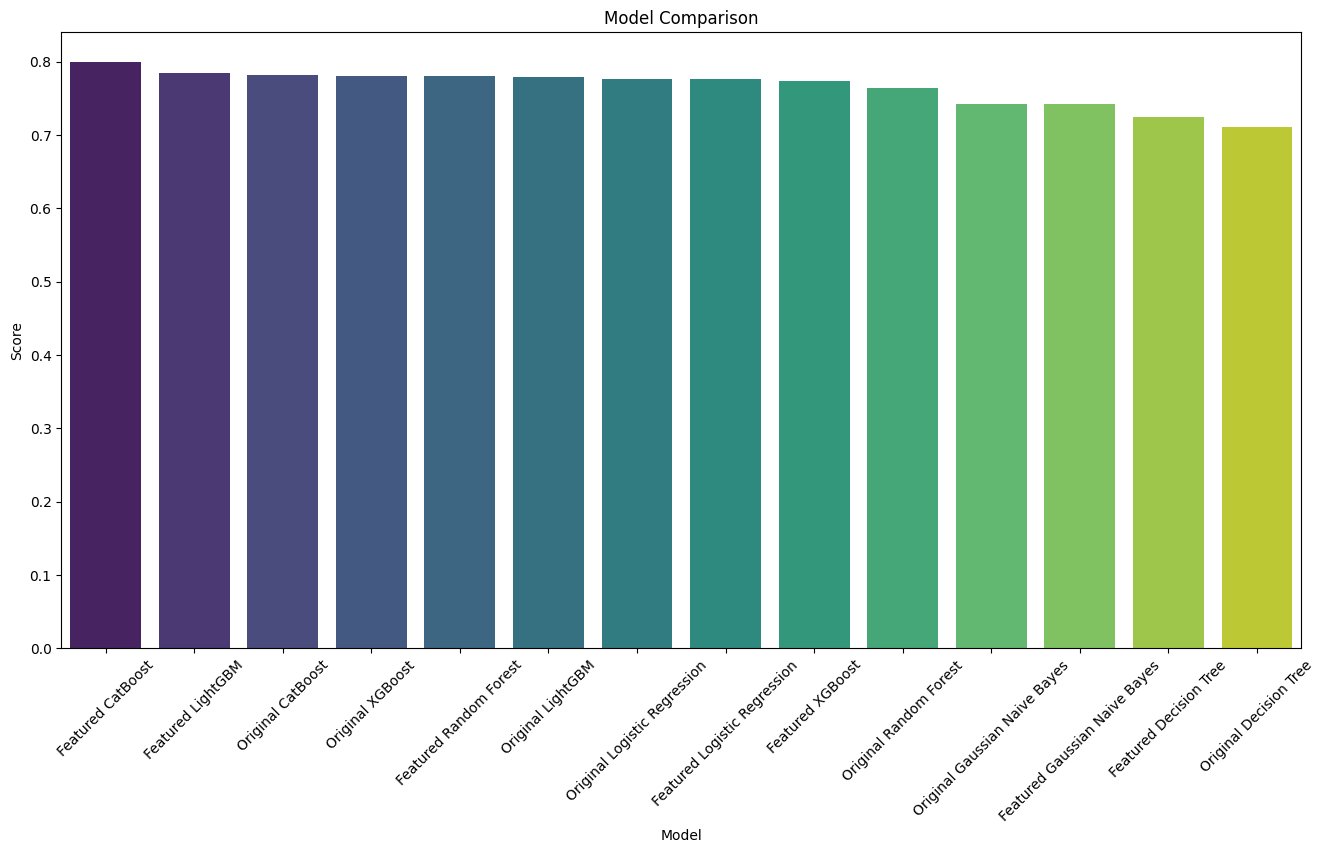

In [95]:
model_comparison(scores)

In [104]:
## In this analysis, we saw that the recall for most models is quite, the best one being 0.72 for logistic regression trained on transformed data.
## If we have to choose a single model without altering the probability threshold, we can go for logiestic regression trained on featured data.
## It has a precision for the good loan applicants of 0.87 and a recall of 0.72 for the bad loan applicants, with 0.76 accuracy.

In [ ]:
## Let's check the effects of changing the threshold for logistic model:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

prediction_logistic = []
for i in range(len(logisticPredictionsProba)):
    if logisticPredictionsProba[i] > 0.4:
        prediction_lr = 1
        prediction_logistic.append(prediction_lr)
    else:
        prediction_lr = 0
        prediction_logistic.append(prediction_lr)

confusion_matrix(y_test_linear, prediction_logistic)


array([[91, 49],
       [15, 45]])

In [112]:
print(classification_report(y_test_linear, prediction_logistic))

              precision    recall  f1-score   support

           0       0.86      0.65      0.74       140
           1       0.48      0.75      0.58        60

    accuracy                           0.68       200
   macro avg       0.67      0.70      0.66       200
weighted avg       0.74      0.68      0.69       200



In [113]:
# When we decrease the threshold to 0.4, we can see that the recall for the bad loan applicants is increased to 0.75.
## The precision is also quite good at 0.86. With this threshold, we can catch more bad loan applicants while preserving business needs.
## However, the accuracy is decreased to < 70%. 

## Saving the Models for Deployment

In [100]:
## When Comparing the models, we can see that some of the models perform better with the original data, while some perform better with the featured data.
## Let's save the best model to a pickle file for future use.

In [114]:
with open('models.pkl', 'wb') as f:
    pickle.dump({
        'logisticRegressor': logisticRegressor,
        'gaussianNB': GaussianNBOriginal,
        'decisionTree': decisionTree,
        'randomForest': randomForest,
        'xgboost': xgboostOriginal,
        'lightgbm': lightgbmOriginal,
        'catboost': catboostOriginal
    }, f)

In [115]:
## Let's also save the lambda values that will help transform the user input data to the same format as the model compatible data:
with open('lambda_values.pkl', 'wb') as f:
    pickle.dump({
        'lambda1': lambda1,
        'lambda2': lambda2,
        'lambda3': lambda3,
        'lambda4': lambda4,
        'lambda5': lambda5
    }, f)

In [103]:
## We can use the saved models and lambda values to predict the user input data in the future.